# K-means
Segmentación basada en el algoritmo de k-medias

In [10]:
import numpy as np
import cv2 as cv
import supervision as sv

####  Leemos la imagen

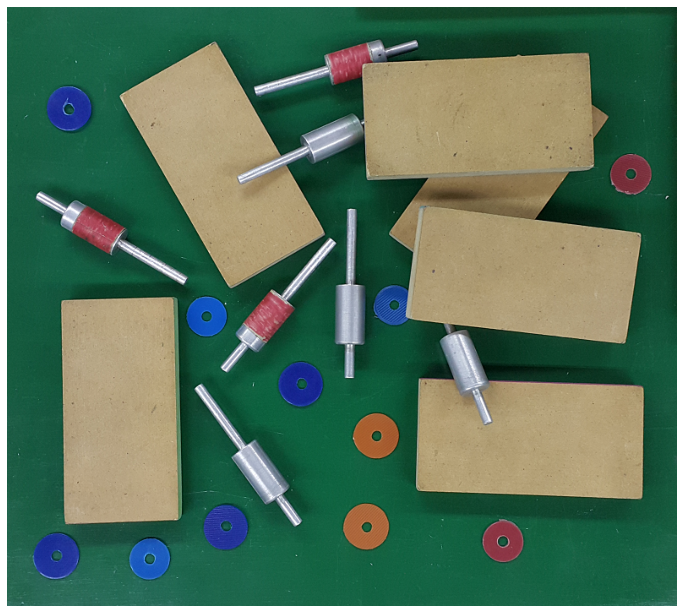

In [11]:
img = cv.imread('piezas.png')
sv.plot_image(img)

#### Corremos K-means

Se basa en un corrimiento a partir de K semillas (se debe indicar el número K de semillas o grupos a identificar) que se desplazan a partir del cálculo iterativo de la media de las características más cercanas.

En particular en este caso lo que se le pasa al algoritmo es una matriz con filas (de 3 columnas) con los colores RGB de cada pixel. De esta manera, cada fila es la característica (color) de ese píxel.

In [12]:
# Cambiamos el tamaño a un array de Mx3 (con M el número de píxels). Es decir, un vector de M componentes por canal (R,G,B)
features = img.reshape((-1,3))
print('Dimensión de la matriz de características (espacio RGB): {}'.format(features.shape))
features = np.float32(features)
print(features[:4]) 

Dimensión de la matriz de características (espacio RGB): (562237, 3)
[[ 68.  98.  26.]
 [ 72. 101.  32.]
 [ 72. 100.  31.]
 [ 70.  99.  29.]]


In [13]:
# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 5

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, attempts=10, flags=cv.KMEANS_RANDOM_CENTERS)

- compact: Suma de distancias cuadradas internas de los puntos al centroide más cercano. Es un indicador de la calidad del clustering.
- label: Array de etiquetas donde cada etiqueta indica a qué cluster pertenece cada punto.
- color_clusters: Array de centros de los clusters.

#### Interpretamos datos

A partir de los centros de los grupos encontrados por K-means y las etiquetas por píxel armamos una nueva imagen con K colores

- center: Centroides de los grupos hallados
- label: etiquetas (replica de los centroides) a los que corresponde cada píxel, en su ubicación en la matriz de Mx3

In [14]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')
# La función también devuelve un parámetro de "compactación" basado en las diferencias cuadradas entre las muestras y los centros hallados  
print('Compactación: \n {} \n'.format(compact))
label[0:15]

Centroides: 
 [[ 58  84  19]
 [215 203 198]
 [162  63  30]
 [ 83  98 134]
 [121 158 176]] 

Compactación: 
 343307120.25158006 



array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

####  Convertimos a uint8 y rearmamos la imagen original con los grupos hallados

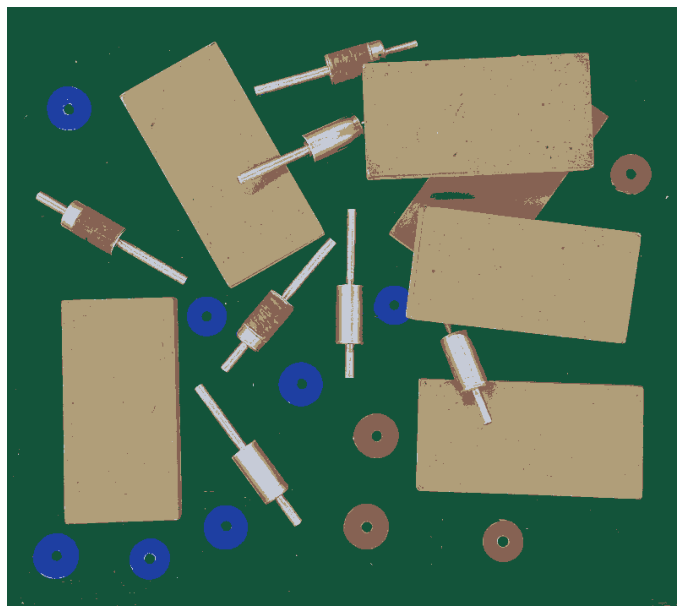

In [15]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((img.shape))

# Mostramos la imagen compuesta
sv.plot_image(img_out)

#### Mascaras de segmentacion

In [19]:
mask_list = list()
for cluster in color_clusters:
  mask = np.zeros(img_out.shape[:2], 'uint8')
  mask[np.where((img_out == cluster).all(axis=2))] = 255
  mask_list.append(mask)

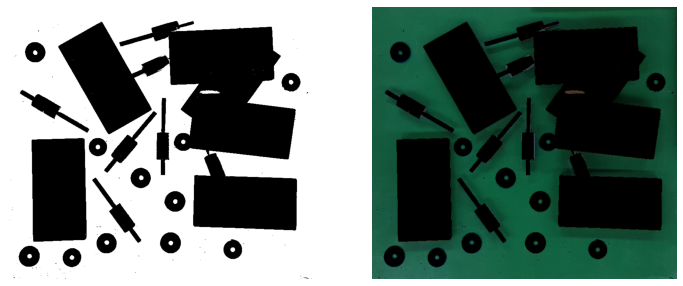

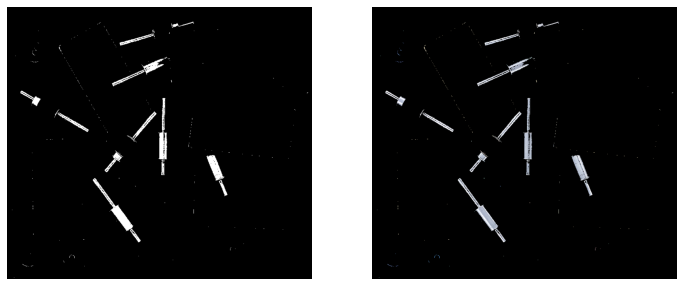

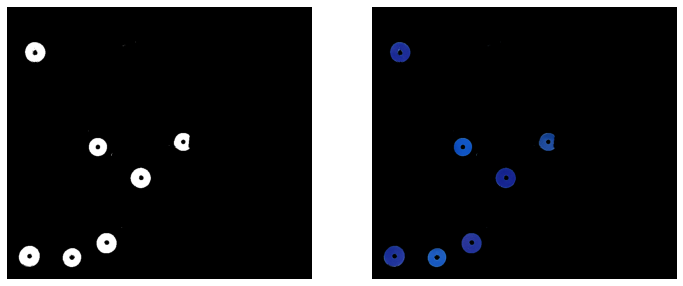

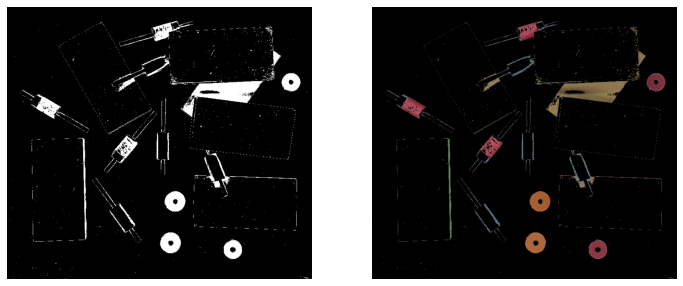

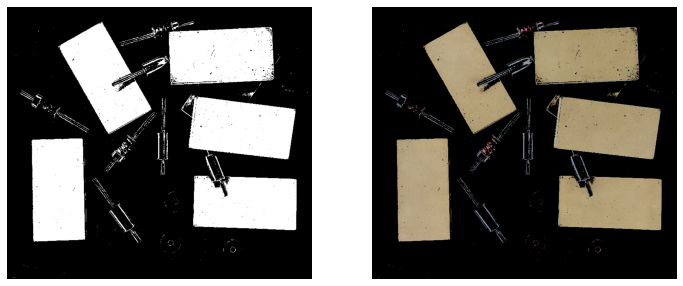

: 

In [ ]:
for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(img, img, mask = mask)
    sv.plot_images_grid([mask, img_segmented], grid_size=(1, 2))

#### Estas mascaras se pueden mejorar aplicando procesamiento morfologico.